<a href="https://colab.research.google.com/github/SarahLares/Clustering_on_Survery/blob/master/Tarea_3_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

## Importamos la Data

In [0]:
url = 'https://raw.githubusercontent.com/SarahLares/Clustering_on_Survery/master/turkiye-student-evaluation_generic.csv'
df = pd.read_csv(url) 

In [26]:
df.shape

(5820, 33)

In [24]:
df.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,3.107388,3.066323,3.041924,3.165979,3.090722,3.183849,3.035567,3.242784,3.290893,3.287285,3.169588,3.398454,3.222509,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,1.280807,1.279097,1.283481,1.268930,1.275309,1.295443,1.305772,1.264201,1.255373,1.253122,1.288015,1.267530,1.279799,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


Podemos observar que solo tres instructores impartieron 13 materias

In [15]:
df.groupby(['instr','class']).count()

nb.repeat  attendance  difficulty   Q1  ...  Q25  Q26  Q27  Q28
instr class                                          ...                    
1     2            140         140         140  140  ...  140  140  140  140
      7            187         187         187  187  ...  187  187  187  187
      10           448         448         448  448  ...  448  448  448  448
2     1            303         303         303  303  ...  303  303  303  303
      6            558         558         558  558  ...  558  558  558  558
      11           484         484         484  484  ...  484  484  484  484
      13            99          99          99   99  ...   99   99   99   99
3     3            904         904         904  904  ...  904  904  904  904
      4            187         187         187  187  ...  187  187  187  187
      5            656         656         656  656  ...  656  656  656  656
      8            500         500         500  500  ...  500  500  500  500
      9            571         571         571  571  ...  571  571  571  571
      12            41          41          41   41  ...   41   41   41   41
      13           742         742         742  742  ...  742  742  742  742

[14 rows x 31 columns]

## Visualicemos un poco los datos

In [0]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()

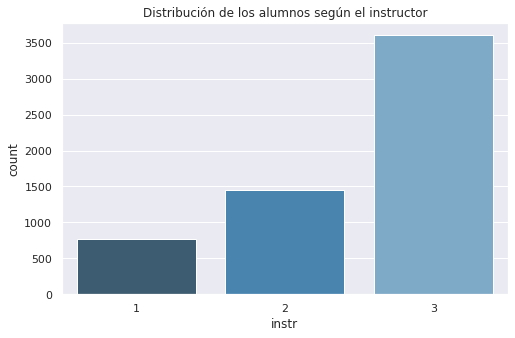

In [17]:
plt.figure(figsize=(8,5))
plt.title("Distribución de los alumnos según el instructor")
sns.countplot(x='instr', data=df, palette="Blues_d")
plt.show()

Podemos observar que el instructor **3** tuvo mas alumnos que respondieron la encuenta que los otros dos instructores.

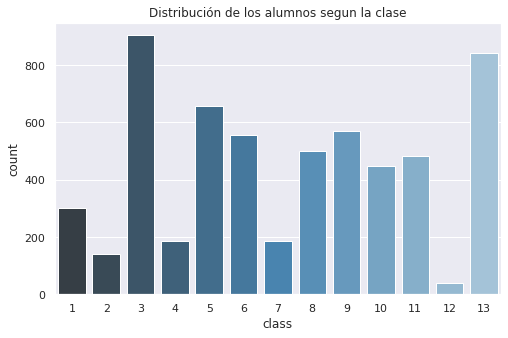

In [22]:
plt.figure(figsize=(8,5))
plt.title("Distribución de los alumnos segun la clase")
sns.countplot(x='class', data=df, palette="Blues_d")
plt.show()

Podemos observar claramente, que hay una desigualdad en la cantidad de alumnos que realizaron la encuesta en cada clase.

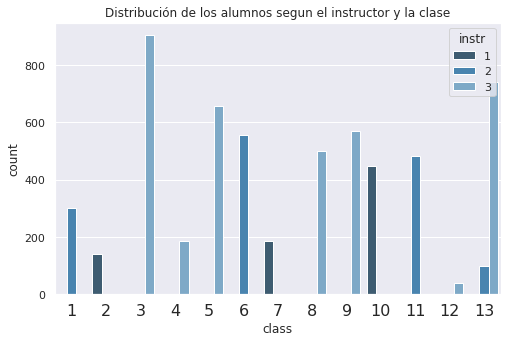

In [109]:
plt.figure(figsize=(8,5))
plt.title("Distribución de los alumnos segun el instructor y la clase")
sns.countplot(x='class', data=df,hue='instr', palette="Blues_d")
plt.tick_params(axis='x', labelsize=16)
plt.show()

Por otra parte, podemos observar que el instructor 3 tuvo más alumnos debido a que imparte más clases con más alumnos que los otros dos instructores.

### Sobre las preguntas en la encuesta

Q1: El contenido del curso semestral, el método de enseñanza y el sistema de evaluación se proporcionaron al principio.

Q2: Las metas y objetivos del curso se establecieron claramente al comienzo del período.

Q3: El curso valió la cantidad de crédito asignado.

Q4: El curso se impartió de acuerdo con el plan de estudios anunciado el primer día de clase.

Q5: Las discusiones en clase, tareas, solicitudes y estudios fueron 
satisfactorios.

Q6: El libro de texto y otros recursos de los cursos fueron suficientes y actualizados.

Q7: El curso permitió trabajo de campo, aplicaciones, laboratorio, discusión y otros estudios.

Q8: Los cuestionarios, tareas, proyectos y exámenes contribuyeron a ayudar al aprendizaje.

Q9: Disfruté mucho la clase y estaba ansioso por participar activamente durante las conferencias.

Q10: Mis expectativas iniciales sobre el curso se cumplieron al final del período o año.

Q11: El curso fue relevante y beneficioso para mi desarrollo profesional.

Q12: El curso me ayudó a mirar la vida y el mundo con una nueva perspectiva.

Q13: El conocimiento del Instructor era relevante y actualizado.

Q14: El instructor vino preparado para las clases.

Q15: El instructor enseñó de acuerdo con el plan de lección anunciado.

Q16: El instructor estaba comprometido con el curso y era comprensible.

Q17: El instructor llegó a tiempo para las clases.

Q18: El Instructor tiene una entrega / discurso suave y fácil de seguir.

Q19: El instructor hizo un uso efectivo de las horas de clase.

Q20: El instructor explicó el curso y estaba ansioso por ayudar a los estudiantes.

Q21: El instructor demostró un enfoque positivo para los estudiantes.

Q22: El instructor fue abierto y respetuoso con las opiniones de los estudiantes sobre el curso.

Q23: El instructor alentó la participación en el curso.

Q24: El instructor asignó tareas / proyectos relevantes y ayudó / guió a los estudiantes.

Q25: El instructor respondió a las preguntas sobre el curso dentro y fuera del curso.

Q26: El sistema de evaluación del Instructor (preguntas intermedias y finales, proyectos, tareas, etc.) midió efectivamente los objetivos del curso.

Q27: El instructor brindó soluciones a los exámenes y los discutió con los estudiantes.

Q28: El Instructor trató a todos los estudiantes de manera correcta y objetiva.

In [0]:
X_Q = df.iloc [:, 5:33] 
Q_means = X_Q.mean(axis = 0) 
Q_means = Q_means.to_frame('mean')
Q_means.reset_index(level=0, inplace=True)

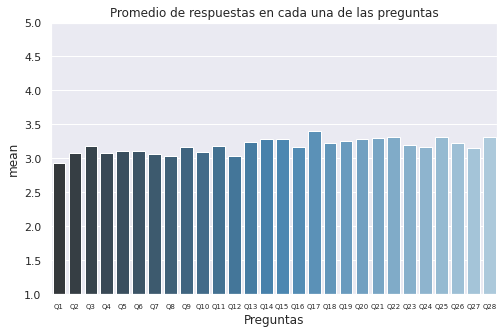

In [148]:
plt.figure(figsize=(8,5))
plt.title("Promedio de respuestas en cada una de las preguntas")
sns.barplot(x='index', y = 'mean', data = Q_means, palette="Blues_d")
plt.tick_params(axis='x', labelsize=7)
plt.xlabel('Preguntas')
plt.ylim(1,5)
plt.show()

Podemos observar que la media de cada pregunda está cercana a **3**


##Selección de los Datos

Sabemos que las respuestas a las preguntas de la encuesta se encuentran de la columna 5 a la 33 y que estas están escaladas con valores discretos del 1 al 5.

In [138]:
X = np.array(df.iloc[:,5:])
X[15:25]


array([[5, 5, 4, 4, 5, 5, 4, 4, 5, 5, 5, 4, 5, 5, 4, 4, 5, 5, 5, 4, 4, 5,
        5, 4, 4, 4, 5, 4],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 5, 5, 5],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 1,
        1, 3, 2, 2, 2, 2],
       [5, 3, 3, 3, 2, 2, 3, 3, 3, 4, 4, 5, 5, 4, 3, 3, 3, 4, 2, 2, 4, 4,
        5, 5, 4, 4, 5, 5],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 5, 5, 

In [0]:
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score

In [169]:
dis = []
sil = []

for i in range(2,15):
  print(i)
  model = KMeans(n_clusters= i, random_state=2)
  model.fit(X)
  dis.append(model.inertia_)

  sil.append(silhouette_score(X, model.fit_predict(X)))

2
3
4
5
6
7
8
9
10
11
12
13
14


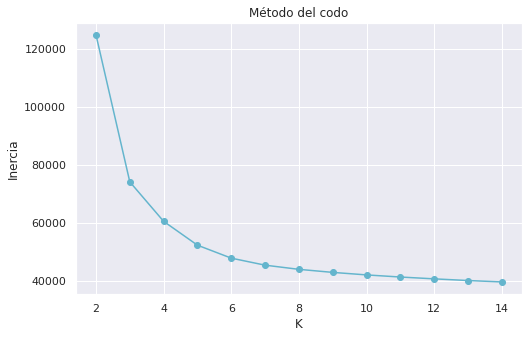

In [171]:
plt.figure(figsize=(8,5))
plt.plot(np.linspace(2,14,13),dis,'co-')
plt.xlabel ('K') 
plt.ylabel ('Inercia')
plt.title('Método del codo') 
plt.show()

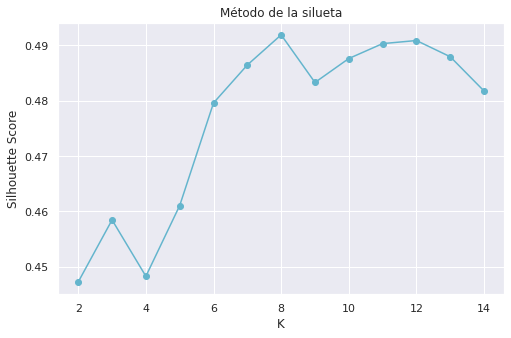

In [172]:
plt.figure(figsize=(8,5))
plt.plot(np.linspace(2,14,13),sil,'co-')
plt.xlabel ('K') 
plt.ylabel ('Silhouette Score')
plt.title('Método de la silueta') 
plt.show()

Como podemos observar se tienen 28 características, lo cual dificultará la visualización de los clusters, por lo cual reduciremos la dimencionalidad utilizando el análisis de componentes principales ( PCA ). 

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=2 , random_state = 1)
X_PCA = pca.fit_transform(X)

In [127]:
pca.explained_variance_ratio_.cumsum () [1] 

0.8671381678891079

In [114]:
X_PCA.shape

(5820, 2)

## K-Means